In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np

In [3]:
result, continuation_token = reviews(
    'com.mobile.legends',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [4]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))

In [5]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e4b1fabe-abf1-4164-9e14-f6cafdb49917,siapa ajalah,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sebenarnya game ini bagus, cuman mohon untuk m...",1,5720,1.8.20.8941,2023-09-29 14:59:26,None,NaT,1.8.20.8941
1,7b62abc7-c275-4013-8e6d-78e74cfa3448,Rio Chandra,https://play-lh.googleusercontent.com/a/ACg8oc...,"Lebih baik pas S29, tidak banyak bug, jaringan...",2,9579,1.8.20.8941,2023-09-25 10:50:30,"Dear Hero,\nTerima kasih atas tanggapan Anda, ...",2023-09-25 14:39:37,1.8.20.8941
2,1d4438ec-65d4-43ad-9c50-413534717ca5,KING Mardhan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kenapa setelah update, kualitas koneksi jadi b...",1,6200,1.8.20.8941,2023-09-27 16:43:20,None,NaT,1.8.20.8941
3,02d9eddd-8038-4606-b9f6-f6ff8003b202,Fitria Ariani,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sebenarnya game ini bagus, cuman mohon untuk m...",1,5671,1.8.20.8941,2023-09-24 16:07:27,None,NaT,1.8.20.8941
4,75e05f97-8113-4c62-992e-b9157dadcb16,Yu_Aldian,https://play-lh.googleusercontent.com/a-/ALV-U...,Dari bintang 5 langsung saya turunkan jadi bin...,1,3173,1.8.20.8941,2023-09-23 22:41:45,None,NaT,1.8.20.8941
...,...,...,...,...,...,...,...,...,...,...,...
995,134ec36e-e589-467b-80ce-0cb2acbbecdf,Muhammad Ridho,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya memang senang sekali bermain game mobile ...,4,0,1.8.20.8941,2023-09-24 17:43:44,"Dear Hero,\nTerima kasih atas tanggapan Anda, ...",2023-09-24 17:36:19,1.8.20.8941
996,3e276944-ef96-4836-aae0-0a15dc8ed105,Dirga Gandol,https://play-lh.googleusercontent.com/a-/ALV-U...,Di game ini kita seperti di curangi.contoh bar...,3,0,1.8.20.8941,2023-09-23 22:12:37,None,NaT,1.8.20.8941
997,b76e78c8-598b-4fde-97cb-57052b3ec969,Dek AL,https://play-lh.googleusercontent.com/a/ACg8oc...,Setelah di update kok skin Hero pada gak bisa ...,3,0,1.8.20.8941,2023-09-20 09:11:46,None,NaT,1.8.20.8941
998,62c25d5f-70e8-4a10-b824-f5d1b6065675,Wulan sc,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ni game makin upgrade makin gj, sebelum update...",2,0,1.8.20.8941,2023-09-21 07:02:44,None,NaT,1.8.20.8941


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  1000 non-null   object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          89 non-null     object        
 9   repliedAt             89 non-null     datetime64[ns]
 10  appVersion            1000 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


In [7]:
data.isna().sum()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            911
repliedAt               911
appVersion                0
dtype: int64

In [8]:
dd = data['score'].value_counts().reset_index()
dd.columns = ['score', 'Counts']
dd = dd.sort_values(by='score')
dd

,score,Counts
0,1,597
1,2,132
2,3,125
4,4,61
3,5,85


In [9]:
df = pd.DataFrame(data[['userName', 'content', 'score']])

In [10]:
df

,userName,content,score
0,siapa ajalah,"Sebenarnya game ini bagus, cuman mohon untuk m...",1
1,Rio Chandra,"Lebih baik pas S29, tidak banyak bug, jaringan...",2
2,KING Mardhan,"Kenapa setelah update, kualitas koneksi jadi b...",1
3,Fitria Ariani,"Sebenarnya game ini bagus, cuman mohon untuk m...",1
4,Yu_Aldian,Dari bintang 5 langsung saya turunkan jadi bin...,1
...,...,...,...
995,Muhammad Ridho,Saya memang senang sekali bermain game mobile ...,4
996,Dirga Gandol,Di game ini kita seperti di curangi.contoh bar...,3
997,Dek AL,Setelah di update kok skin Hero pada gak bisa ...,3
998,Wulan sc,"Ni game makin upgrade makin gj, sebelum update...",2


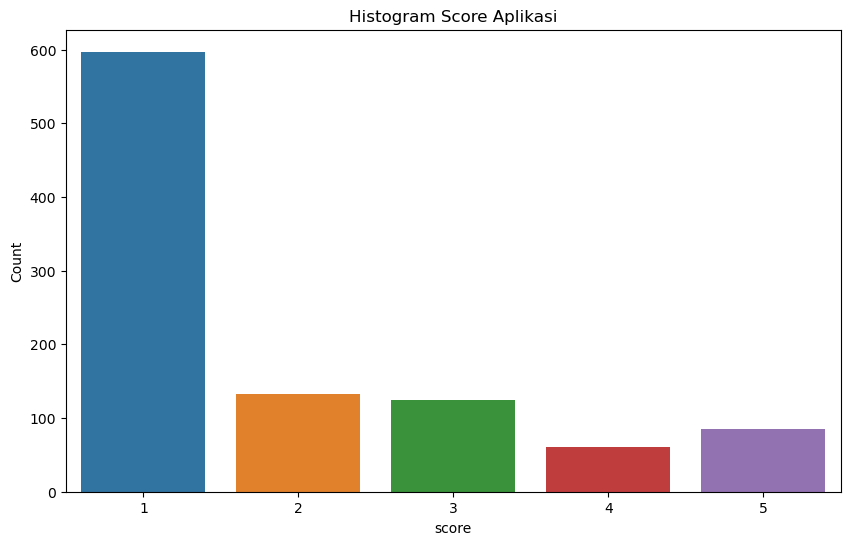

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='score', y='Counts', data=dd)
plt.title('Histogram Score Aplikasi')
plt.xlabel('score')
plt.ylabel('Count')
plt.show()